<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-10/blob/main/TrabajoIATipos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook, vamos a realizar lo mismo que en los anteriores pero con los tipos de obras (SECCION_CIENTIFICA), ya que la categorización por edades no nos da demasiados buenos resultados

In [1]:
!wget https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1 -O dataset

--2021-05-30 08:29:20--  https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8bderlaqfere52h/var.zip [following]
--2021-05-30 08:29:20--  https://www.dropbox.com/s/dl/8bderlaqfere52h/var.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d6cead792808124204a8c237e.dl.dropboxusercontent.com/cd/0/get/BPdz8LOVyLUFA05tNLU-ZIAYj-jpsewhBYDlozHfb5mkRb0P4I1QzBKHRVzntI7ofdj_bSI2Eeek9aSlTwcC8tYMvFtnDtiKBwnlNn6kgD_6O1EmilvZsriS3037v4DO94auCNXN6Q3q7hcj5xSLhgmv/file?dl=1# [following]
--2021-05-30 08:29:20--  https://uc2d6cead792808124204a8c237e.dl.dropboxusercontent.com/cd/0/get/BPdz8LOVyLUFA05tNLU-ZIAYj-jpsewhBYDlozHfb5mkRb0P4I1QzBKHRVzntI7ofdj_bSI2Eeek9aSlTwcC8tYMvFtnDtiKBwnlNn6

In [2]:
!unzip dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/27949.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/28728.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30674.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30675.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30677.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30678.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30679.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30680.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30683.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30685.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30687.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N

In [3]:
import pandas as pd

In [4]:
!wget https://www.dropbox.com/s/nk8u90azzz3rd0i/MuseoDeLaRioja.zip?dl=1 -O MuseoDeLaRioja
!unzip MuseoDeLaRioja

--2021-05-30 08:30:01--  https://www.dropbox.com/s/nk8u90azzz3rd0i/MuseoDeLaRioja.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/nk8u90azzz3rd0i/MuseoDeLaRioja.zip [following]
--2021-05-30 08:30:01--  https://www.dropbox.com/s/dl/nk8u90azzz3rd0i/MuseoDeLaRioja.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d4b4903137f5adc5cb1111c4c.dl.dropboxusercontent.com/cd/0/get/BPeGVVLG1jHug6VBjjaMeT05AOtV53kuCU36Qvr2ZvQgTeDjB5_N-YRiINNp5MzByAk1nA0slphKYjrIGrL86V-QG7m3sxVdF0RyUNLR-R9zuhv4-vx0jEpCm4tEbvqvL_wmMZTZM9eKB_p0bJ-g052O/file?dl=1# [following]
--2021-05-30 08:30:01--  https://uc7d4b4903137f5adc5cb1111c4c.dl.dropboxusercontent.com/cd/0/get/BPeGVVLG1jHug6VBjjaMeT05AOtV53kuCU36Qvr2ZvQgTeDjB5_N-YRiINNp5MzByAk1nA

In [5]:
df = pd.read_excel('/content/MuseoDeLaRioja.xlsx', usecols=["ID_NUM","SECCION_CIENTIFICA"])
df.head()

,ID_NUM,SECCION_CIENTIFICA
0,4835,6
1,4836,6
2,4839,10
3,4840,10
4,4844,10


In [6]:
!mkdir cleanedDataset

In [7]:
import os 
from google.colab import files
import shutil
import PIL

In [8]:
def cleanDataset(directorioOrigen, directorioDestino):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (os.path.isdir(os.path.join(directorioOrigen,os.path.basename(fichero)))):
      cleanDataset(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino) 
    else :
      if (os.path.exists(directorioDestino + '/' + os.path.basename(fichero))):
        image1 = PIL.Image.open(directorioDestino + '/' + os.path.basename(fichero))
        image2 = PIL.Image.open(os.path.join(directorioOrigen,os.path.basename(fichero)))
        width1, height1 = image1.size
        width2, height2 = image2.size
        if (width1 < width2 and height1 < height2):
          os.remove(directorioDestino + '/' + os.path.basename(fichero))
          shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))
      else:
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))

In [9]:
!rm /content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/11/8497.jpg

In [10]:
cleanDataset('/content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080', '/content/cleanedDataset')

In [11]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 26.8MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [12]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

In [13]:
path = Path('data/museo')

In [14]:
df['SECCION_CIENTIFICA'].value_counts()

10    1028
6      884
12     491
21     224
3      148
13      97
2       92
22      75
18      30
24      21
7       19
17      18
26      17
9        9
11       8
1        6
25       5
19       4
23       3
20       1
16       1
4        1
Name: SECCION_CIENTIFICA, dtype: int64

In [15]:
for im in verify_images(get_image_files('/content/cleanedDataset')):
    os.remove(str(im))

In [16]:
def moveImages(directorioOrigen):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (bool(df.loc[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['SECCION_CIENTIFICA'].to_dict())): # Comprobamos que esta, porque hay imagenes que no estan en el DataFrame y viceversa
      dictionary = df[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['SECCION_CIENTIFICA'].to_dict()
      siglo = float([x for x in dictionary.values()][0])
      if (not math.isnan(siglo)):
        siglo = str(int(siglo))
        if (not os.path.exists('/content/'+ siglo)):
          os.mkdir(siglo)
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), '/content/'+ siglo + '/' + os.path.basename(fichero))

In [17]:
moveImages('/content/cleanedDataset')

In [18]:
(path/'train/1').mkdir(parents=True,exist_ok=True)
(path/'train/2').mkdir(parents=True,exist_ok=True)
(path/'train/3').mkdir(parents=True,exist_ok=True)
(path/'train/6').mkdir(parents=True,exist_ok=True)
(path/'train/7').mkdir(parents=True,exist_ok=True)
(path/'train/9').mkdir(parents=True,exist_ok=True)
(path/'train/10').mkdir(parents=True,exist_ok=True)
(path/'train/11').mkdir(parents=True,exist_ok=True)
(path/'train/12').mkdir(parents=True,exist_ok=True)
(path/'train/13').mkdir(parents=True,exist_ok=True)
(path/'train/17').mkdir(parents=True,exist_ok=True)
(path/'train/18').mkdir(parents=True,exist_ok=True)
(path/'train/19').mkdir(parents=True,exist_ok=True)
(path/'train/21').mkdir(parents=True,exist_ok=True)
(path/'train/22').mkdir(parents=True,exist_ok=True)
(path/'train/23').mkdir(parents=True,exist_ok=True)
(path/'train/24').mkdir(parents=True,exist_ok=True)

(path/'test/1').mkdir(parents=True,exist_ok=True)
(path/'test/2').mkdir(parents=True,exist_ok=True)
(path/'test/3').mkdir(parents=True,exist_ok=True)
(path/'test/6').mkdir(parents=True,exist_ok=True)
(path/'test/7').mkdir(parents=True,exist_ok=True)
(path/'test/9').mkdir(parents=True,exist_ok=True)
(path/'test/10').mkdir(parents=True,exist_ok=True)
(path/'test/11').mkdir(parents=True,exist_ok=True)
(path/'test/12').mkdir(parents=True,exist_ok=True)
(path/'test/13').mkdir(parents=True,exist_ok=True)
(path/'test/17').mkdir(parents=True,exist_ok=True)
(path/'test/18').mkdir(parents=True,exist_ok=True)
(path/'test/19').mkdir(parents=True,exist_ok=True)
(path/'test/21').mkdir(parents=True,exist_ok=True)
(path/'test/22').mkdir(parents=True,exist_ok=True)
(path/'test/23').mkdir(parents=True,exist_ok=True)
(path/'test/24').mkdir(parents=True,exist_ok=True)


Eliminamos las carpetas que tengan solo 1 imagen

In [19]:
shutil.rmtree('/content/1')
shutil.rmtree('/content/19')

In [20]:
shutil.rmtree('/content/11')

In [21]:
trainDos, testDos = train_test_split(get_image_files('/content/2'),test_size=0.3,random_state=15)
trainTres, testTres = train_test_split(get_image_files('/content/3'),test_size=0.3,random_state=15)
trainSeis, testSeis = train_test_split(get_image_files('/content/6'),test_size=0.3,random_state=15)
trainSiete, testSiete = train_test_split(get_image_files('/content/7'),test_size=0.3,random_state=15)
trainNueve, testNueve = train_test_split(get_image_files('/content/9'),test_size=0.3,random_state=15)
trainDiez, testDiez = train_test_split(get_image_files('/content/10'),test_size=0.3,random_state=15)
trainDoce, testDoce = train_test_split(get_image_files('/content/12'),test_size=0.3,random_state=15)
trainTrece, testTrece = train_test_split(get_image_files('/content/13'),test_size=0.3,random_state=15)
trainDiezSiete, testDiezSiete = train_test_split(get_image_files('/content/17'),test_size=0.3,random_state=15)
trainDiezOcho, testDiezOcho = train_test_split(get_image_files('/content/18'),test_size=0.3,random_state=15)
trainVeinteUno, testVeinteUno = train_test_split(get_image_files('/content/21'),test_size=0.3,random_state=15)
trainVeinteDos, testVeinteDos = train_test_split(get_image_files('/content/22'),test_size=0.3,random_state=15)
trainVeinteTres, testVeinteTres = train_test_split(get_image_files('/content/23'),test_size=0.5,random_state=15)
trainVeinteCuatro, testVeinteCuatro = train_test_split(get_image_files('/content/24'),test_size=0.3,random_state=15)

In [22]:
for x in trainDiez:
  shutil.move(str(x),path/('train/10/'+x.name))

for x in trainDoce:
  shutil.move(str(x),path/('train/12/'+x.name))

for x in trainTrece:
  shutil.move(str(x),path/('train/13/'+x.name))

for x in trainDiezSiete:
  shutil.move(str(x),path/('train/17/'+x.name))

for x in trainDiezOcho:
  shutil.move(str(x),path/('train/18/'+x.name))

for x in trainDos:
  shutil.move(str(x),path/('train/2/'+x.name))

for x in trainVeinteUno:
  shutil.move(str(x),path/('train/21/'+x.name))

for x in trainVeinteDos:
  shutil.move(str(x),path/('train/22/'+x.name))

for x in trainVeinteTres:
  shutil.move(str(x),path/('train/23/'+x.name))

for x in trainVeinteCuatro:
  shutil.move(str(x),path/('train/24/'+x.name))

for x in trainTres:
  shutil.move(str(x),path/('train/3/'+x.name))

for x in trainSeis:
  shutil.move(str(x),path/('train/6/'+x.name))

for x in trainSiete:
  shutil.move(str(x),path/('train/7/'+x.name))

for x in trainNueve:
  shutil.move(str(x),path/('train/9/'+x.name))




for x in testDiez:
  shutil.move(str(x),path/('test/10/'+x.name))

for x in testDoce:
  shutil.move(str(x),path/('test/12/'+x.name))

for x in testTrece:
  shutil.move(str(x),path/('test/13/'+x.name))

for x in testDiezSiete:
  shutil.move(str(x),path/('test/17/'+x.name))

for x in testDiezOcho:
  shutil.move(str(x),path/('test/18/'+x.name))

for x in testDos:
  shutil.move(str(x),path/('test/2/'+x.name))

for x in testVeinteUno:
  shutil.move(str(x),path/('test/21/'+x.name))

for x in testVeinteDos:
  shutil.move(str(x),path/('test/22/'+x.name))

for x in testVeinteTres:
  shutil.move(str(x),path/('test/23/'+x.name))

for x in testVeinteCuatro:
  shutil.move(str(x),path/('test/24/'+x.name))

for x in testTres:
  shutil.move(str(x),path/('test/3/'+x.name))

for x in testSeis:
  shutil.move(str(x),path/('train/6/'+x.name))

for x in testSiete:
  shutil.move(str(x),path/('train/7/'+x.name))

for x in testNueve:
  shutil.move(str(x),path/('train/9/'+x.name))

In [23]:
shutil.rmtree('/content/10')
shutil.rmtree('/content/12')
shutil.rmtree('/content/13')
shutil.rmtree('/content/17')
shutil.rmtree('/content/18')
shutil.rmtree('/content/2')
shutil.rmtree('/content/21')
shutil.rmtree('/content/22')
shutil.rmtree('/content/23')
shutil.rmtree('/content/24')
shutil.rmtree('/content/3')
shutil.rmtree('/content/6')
shutil.rmtree('/content/7')
shutil.rmtree('/content/9')
shutil.rmtree('/content/cleanedDataset')
shutil.rmtree('/content/var')

In [24]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [25]:
trainPath = Path('/content/data/museo/train')

In [26]:
dls = db.dataloaders(trainPath,bs=128)

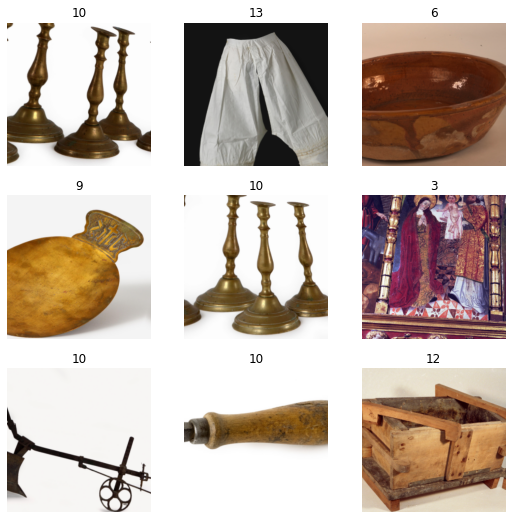

In [27]:
dls.show_batch()

In [28]:
learn = cnn_learner(dls,resnet50,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [29]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.868510,3.485167,0.168224,00:48


epoch,train_loss,valid_loss,accuracy,time
0,2.125744,1.982939,0.420561,00:47
1,1.865988,1.189883,0.728972,00:47
2,1.552412,0.914617,0.785047,00:47
3,1.295013,0.789721,0.794393,00:47
4,1.093194,0.739204,0.794393,00:47
5,0.923084,0.746906,0.766355,00:47
6,0.797322,0.722172,0.785047,00:47
7,0.696880,0.705640,0.803738,00:47
8,0.621290,0.696827,0.803738,00:47
9,0.559276,0.696103,0.813084,00:47


In [30]:
learn.export('tipos.pkl')

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

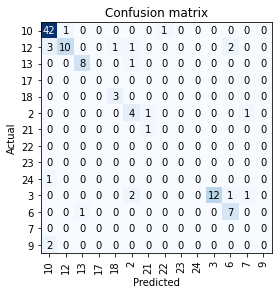

In [32]:
interp.plot_confusion_matrix()

In [33]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=64)

In [34]:
learn.dls = dlsTest

In [35]:
learn.validate()

(#2) [1.8544702529907227,0.6341463327407837]

In [36]:
dls = db.dataloaders(trainPath,bs=16)

Probamos con la libreria tim y arquitectura resnetrs50

In [37]:
!pip install timm
import timm 

     |████████████████████████████████| 348kB 27.3MB/s 


In [38]:
learn = Learner(dls, timm.create_model('resnetrs50'),metrics=accuracy).to_fp16()

In [39]:
history = learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.919164,2.219521,0.401869,00:45


epoch,train_loss,valid_loss,accuracy,time
0,1.592769,1.957956,0.429907,00:44
1,1.546119,1.641993,0.429907,00:44
2,1.556497,1.890873,0.392523,00:44
3,1.569435,1.601986,0.523364,00:44
4,1.528263,1.567798,0.551402,00:44
5,1.471829,1.331607,0.579439,00:44
6,1.327856,1.450680,0.579439,00:45
7,1.229408,1.539513,0.570093,00:44
8,1.129297,1.472619,0.551402,00:45
9,1.066712,1.451984,0.551402,00:47


In [40]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),         
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=64)

In [41]:
learn.dls = dlsTest

In [42]:
learn.validate()

(#2) [1.2536847591400146,0.5951219797134399]

In [43]:
learn.export('tipos2.pkl')

Finalmente nos quedamos con el modelo usando arquitectura Resnet 50 que nos proporciona una accuracy de 63,4%